# Partie 2

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

features_df = pd.read_csv('/home/yduan/5aS9/Apprentissage_supervise/acsincome_ca_features.csv')
labels_df = pd.read_csv('/home/yduan/5aS9/Apprentissage_supervise/acsincome_ca_labels.csv')


## Corrélations entre chacune des features et le label à partir des données d’entrainement

In [2]:
data = pd.concat([features_df, labels_df], axis=1)

data_sampled = data.sample(frac=0.1, random_state=42)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(data.drop('PINCP', axis=1), data['PINCP'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data_sampled.drop('PINCP', axis=1), data_sampled['PINCP'], test_size=0.2, random_state=42)


merged_df = pd.merge(X_train_all, y_train_all, left_index=True, right_index=True)

correlations = merged_df.corr()
print(correlations)

           AGEP       COW      SCHL       MAR      OCCP      POBP      RELP  \
AGEP   1.000000  0.209702  0.007539 -0.482688 -0.086660  0.142184 -0.284084   
COW    0.209702  1.000000  0.077531 -0.116570 -0.086889 -0.023757 -0.062549   
SCHL   0.007539  0.077531  1.000000 -0.038652 -0.394825 -0.289878 -0.111339   
MAR   -0.482688 -0.116570 -0.038652  1.000000  0.099353 -0.175064  0.378212   
OCCP  -0.086660 -0.086889 -0.394825  0.099353  1.000000  0.109976  0.114464   
POBP   0.142184 -0.023757 -0.289878 -0.175064  0.109976  1.000000 -0.033897   
RELP  -0.284084 -0.062549 -0.111339  0.378212  0.114464 -0.033897  1.000000   
WKHP   0.073108 -0.038568  0.061270 -0.139318 -0.061381  0.039668 -0.079981   
SEX   -0.007967 -0.014505  0.065364  0.021087 -0.118450 -0.027322 -0.021228   
RAC1P -0.110252 -0.077083 -0.117179  0.038171  0.070053  0.286813  0.043308   
PINCP  0.265710  0.052062  0.350858 -0.265999 -0.342678 -0.086489 -0.229454   

           WKHP       SEX     RAC1P     PINCP  
AGE

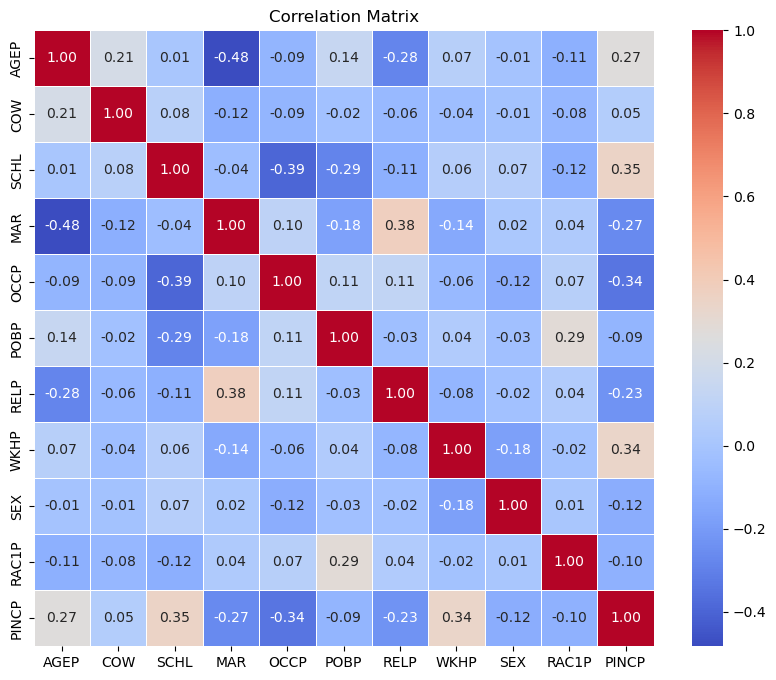

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

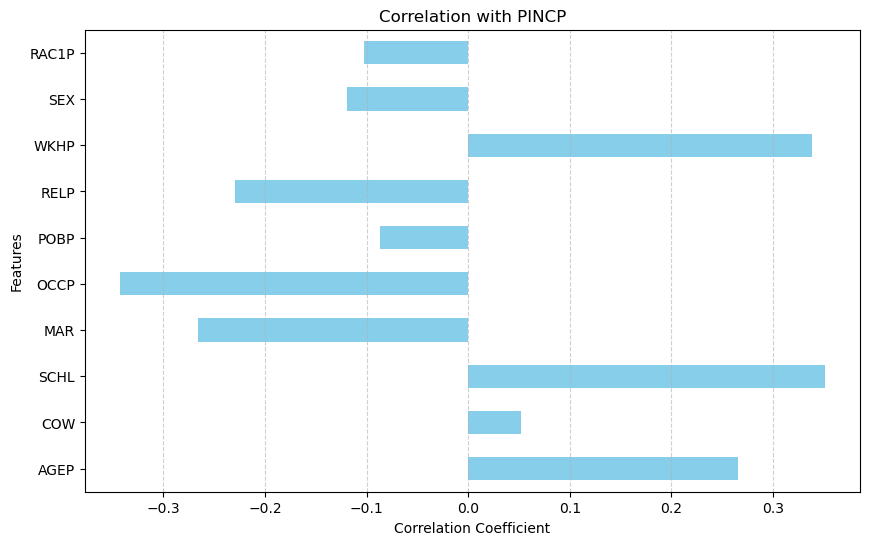

In [4]:
plt.figure(figsize=(10, 6))
correlations.iloc[:-1]['PINCP'].plot(kind='barh', color='skyblue')
plt.title('Correlation with PINCP')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

## SVM

### Correlation avec SVM

In [5]:
svm_model = SVC(C=1, kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test_all)

df_pred_y_svm = pd.DataFrame(y_pred_svm, columns=['PINCP'])
merged_svm = pd.merge(X_test_all, df_pred_y_svm, left_index=True, right_index=True)

correlations_svm = merged_svm.corr()
print(correlations_svm)

           AGEP       COW      SCHL       MAR      OCCP      POBP      RELP  \
AGEP   1.000000  0.157100  0.019093 -0.539055 -0.115295  0.176205 -0.393154   
COW    0.157100  1.000000  0.066488 -0.088612 -0.056372 -0.040668  0.001903   
SCHL   0.019093  0.066488  1.000000 -0.040404 -0.380248 -0.274102 -0.128223   
MAR   -0.539055 -0.088612 -0.040404  1.000000  0.135398 -0.203711  0.456431   
OCCP  -0.115295 -0.056372 -0.380248  0.135398  1.000000  0.059838  0.173786   
POBP   0.176205 -0.040668 -0.274102 -0.203711  0.059838  1.000000 -0.087158   
RELP  -0.393154  0.001903 -0.128223  0.456431  0.173786 -0.087158  1.000000   
WKHP   0.121230 -0.008204  0.049207 -0.168743 -0.019337  0.039981 -0.110205   
SEX    0.013512 -0.035906  0.071345  0.006876 -0.140893 -0.014017 -0.049591   
RAC1P -0.088806 -0.077131 -0.121674  0.027233  0.040149  0.305856  0.016153   
PINCP  0.016198  0.013919 -0.015156 -0.015246 -0.008194 -0.011008 -0.024382   

           WKHP       SEX     RAC1P     PINCP  
AGE

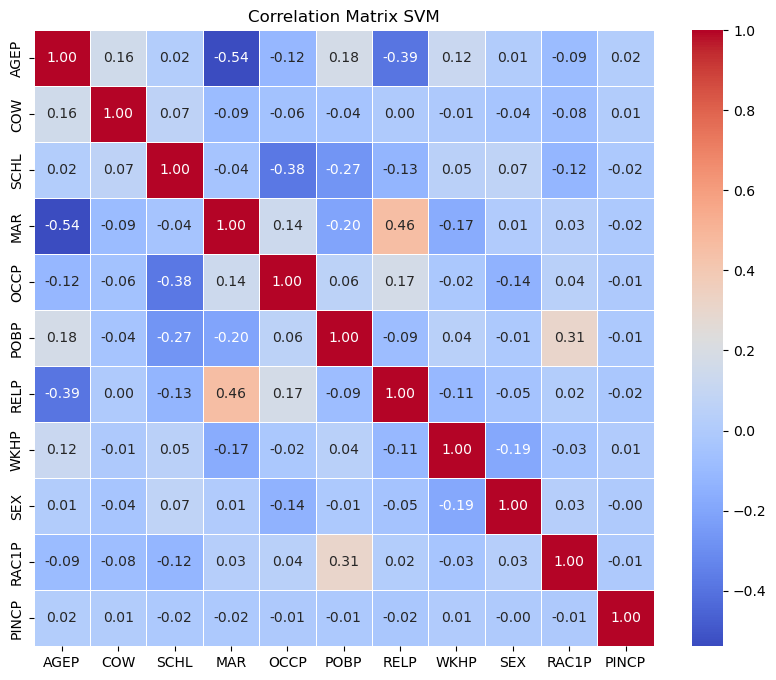

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_svm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix SVM')
plt.show()

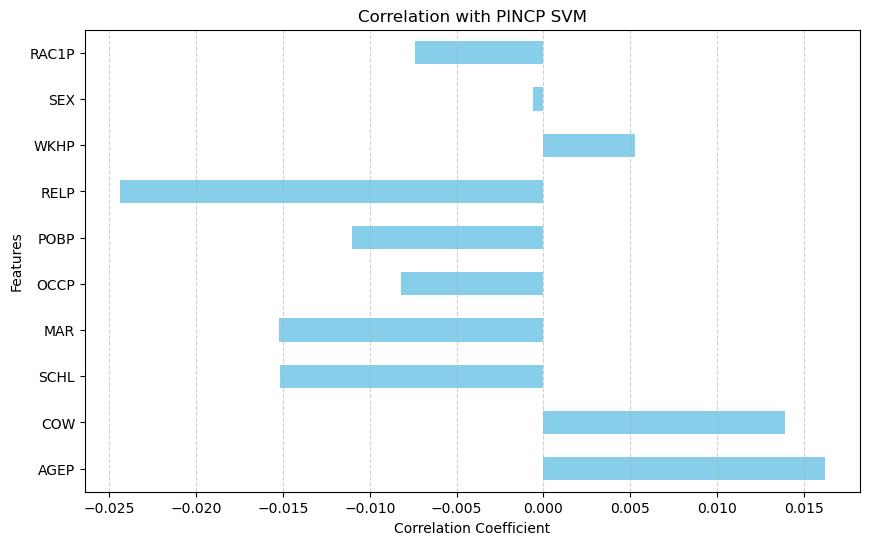

In [7]:
plt.figure(figsize=(10, 6))
correlations_svm.iloc[:-1]['PINCP'].plot(kind='barh', color='skyblue')
plt.title('Correlation with PINCP SVM')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### Evaluez l’importance de chaque feature

In [8]:
perm_importance_svm = permutation_importance(svm_model, X_test_all, df_pred_y_svm, random_state=42).importances_mean

for i in range(len(perm_importance_svm)):
    print(f"Feature {i}: ", perm_importance_svm[i])

Feature 0:  0.0021005289653234006
Feature 1:  0.0
Feature 2:  0.0001584340582117205
Feature 3:  4.5996984642138194e-05
Feature 4:  0.4347788311655124
Feature 5:  0.0011141491835535255
Feature 6:  0.00014310172999765225
Feature 7:  0.0029386962410242077
Feature 8:  0.0
Feature 9:  2.0443104285394753e-05


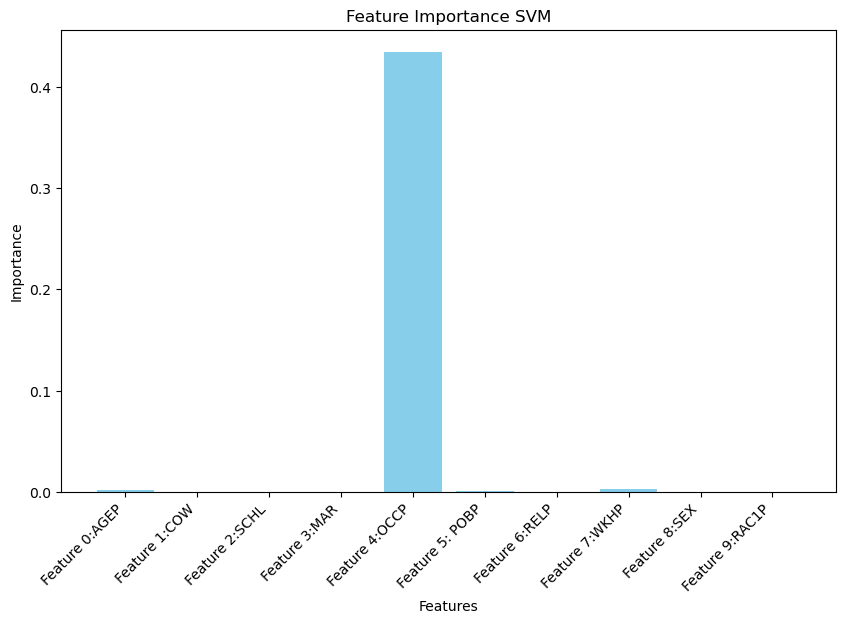

In [9]:
features = ['Feature 0:AGEP', 'Feature 1:COW', 'Feature 2:SCHL', 'Feature 3:MAR', 'Feature 4:OCCP',
            'Feature 5: POBP', 'Feature 6:RELP', 'Feature 7:WKHP', 'Feature 8:SEX', 'Feature 9:RAC1P']
plt.figure(figsize=(10, 6))
plt.bar(features, perm_importance_svm, color='skyblue')
plt.title('Feature Importance SVM')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right') 
plt.show()

## Random Forest

### Correlation avec Random Forest

In [10]:
rf_model = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test_all)

df_pred_y_rf = pd.DataFrame(y_pred_rf, columns=['PINCP'])

merged_rf = pd.merge(X_test_all, df_pred_y_rf, left_index=True, right_index=True)

correlations_rf = merged_rf.corr()
print(correlations_rf)

           AGEP       COW      SCHL       MAR      OCCP      POBP      RELP  \
AGEP   1.000000  0.157100  0.019093 -0.539055 -0.115295  0.176205 -0.393154   
COW    0.157100  1.000000  0.066488 -0.088612 -0.056372 -0.040668  0.001903   
SCHL   0.019093  0.066488  1.000000 -0.040404 -0.380248 -0.274102 -0.128223   
MAR   -0.539055 -0.088612 -0.040404  1.000000  0.135398 -0.203711  0.456431   
OCCP  -0.115295 -0.056372 -0.380248  0.135398  1.000000  0.059838  0.173786   
POBP   0.176205 -0.040668 -0.274102 -0.203711  0.059838  1.000000 -0.087158   
RELP  -0.393154  0.001903 -0.128223  0.456431  0.173786 -0.087158  1.000000   
WKHP   0.121230 -0.008204  0.049207 -0.168743 -0.019337  0.039981 -0.110205   
SEX    0.013512 -0.035906  0.071345  0.006876 -0.140893 -0.014017 -0.049591   
RAC1P -0.088806 -0.077131 -0.121674  0.027233  0.040149  0.305856  0.016153   
PINCP -0.002597  0.004813 -0.020099 -0.005491  0.021242  0.001109 -0.003063   

           WKHP       SEX     RAC1P     PINCP  
AGE

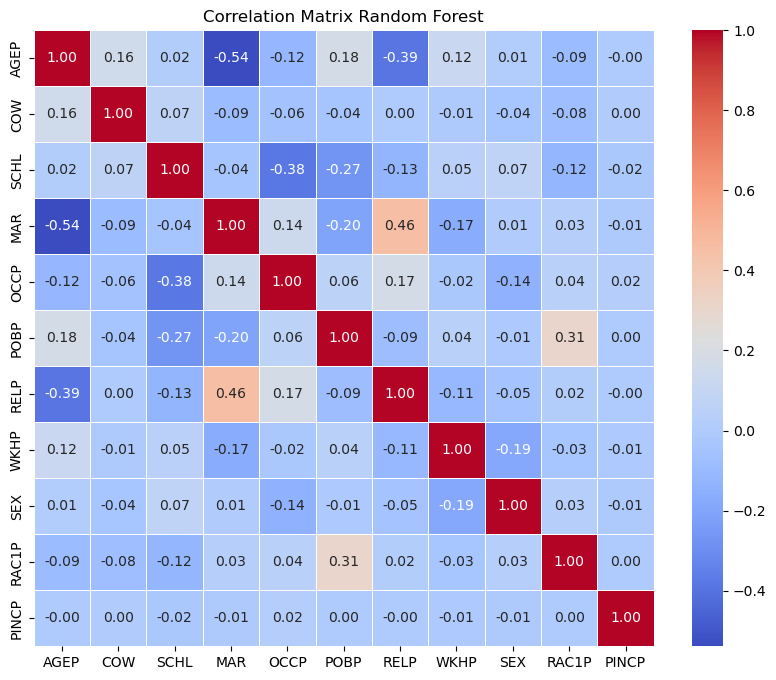

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_rf, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Random Forest')
plt.show()

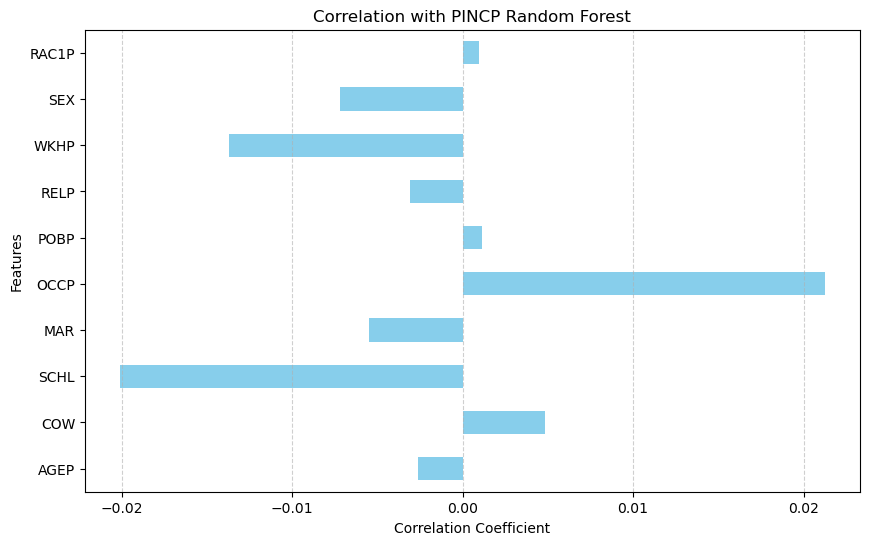

In [12]:
plt.figure(figsize=(10, 6))
correlations_rf.iloc[:-1]['PINCP'].plot(kind='barh', color='skyblue')
plt.title('Correlation with PINCP Random Forest')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### Evaluez l’importance de chaque feature

In [13]:
perm_importance_rf = permutation_importance(rf_model, X_test_all, df_pred_y_rf, random_state=42).importances_mean

for i in range(len(perm_importance_rf)):
    print(f"Feature {i}: ", perm_importance_rf[i])

Feature 0:  0.10595149873508292
Feature 1:  0.01528122045332585
Feature 2:  0.15087010962614672
Feature 3:  0.028972989548462925
Feature 4:  0.12415608310121891
Feature 5:  0.037298443768686275
Feature 6:  0.07618633889556128
Feature 7:  0.16452099251271307
Feature 8:  0.03647049804512816
Feature 9:  0.017402192522934623


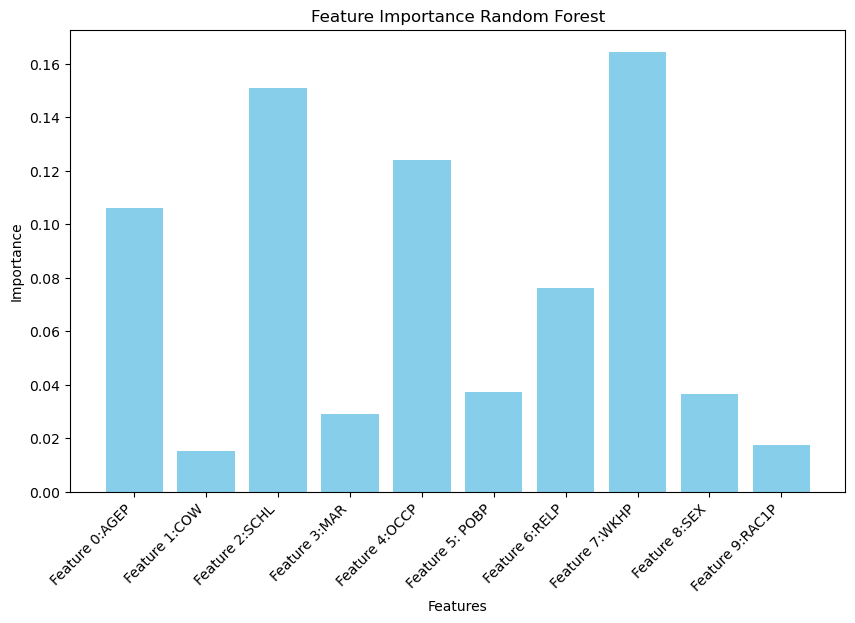

In [14]:
features = ['Feature 0:AGEP', 'Feature 1:COW', 'Feature 2:SCHL', 'Feature 3:MAR', 'Feature 4:OCCP',
            'Feature 5: POBP', 'Feature 6:RELP', 'Feature 7:WKHP', 'Feature 8:SEX', 'Feature 9:RAC1P']
plt.figure(figsize=(10, 6))
plt.bar(features, perm_importance_rf, color='skyblue')
plt.title('Feature Importance Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right') 
plt.show()

## Ada Boost

### Correlation avec Ada Boost

In [15]:
ab_model = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.5, n_estimators=20)
ab_model.fit(X_train, y_train)
y_pred_ab = ab_model.predict(X_test_all)

df_pred_y_ab = pd.DataFrame(y_pred_ab, columns=['PINCP'])

merged_ab = pd.merge(X_test_all, df_pred_y_ab, left_index=True, right_index=True)

correlations_ab = merged_ab.corr()
print(correlations_ab)

           AGEP       COW      SCHL       MAR      OCCP      POBP      RELP  \
AGEP   1.000000  0.157100  0.019093 -0.539055 -0.115295  0.176205 -0.393154   
COW    0.157100  1.000000  0.066488 -0.088612 -0.056372 -0.040668  0.001903   
SCHL   0.019093  0.066488  1.000000 -0.040404 -0.380248 -0.274102 -0.128223   
MAR   -0.539055 -0.088612 -0.040404  1.000000  0.135398 -0.203711  0.456431   
OCCP  -0.115295 -0.056372 -0.380248  0.135398  1.000000  0.059838  0.173786   
POBP   0.176205 -0.040668 -0.274102 -0.203711  0.059838  1.000000 -0.087158   
RELP  -0.393154  0.001903 -0.128223  0.456431  0.173786 -0.087158  1.000000   
WKHP   0.121230 -0.008204  0.049207 -0.168743 -0.019337  0.039981 -0.110205   
SEX    0.013512 -0.035906  0.071345  0.006876 -0.140893 -0.014017 -0.049591   
RAC1P -0.088806 -0.077131 -0.121674  0.027233  0.040149  0.305856  0.016153   
PINCP -0.003535  0.003652 -0.017033 -0.008139  0.011384 -0.000865 -0.006448   

           WKHP       SEX     RAC1P     PINCP  
AGE

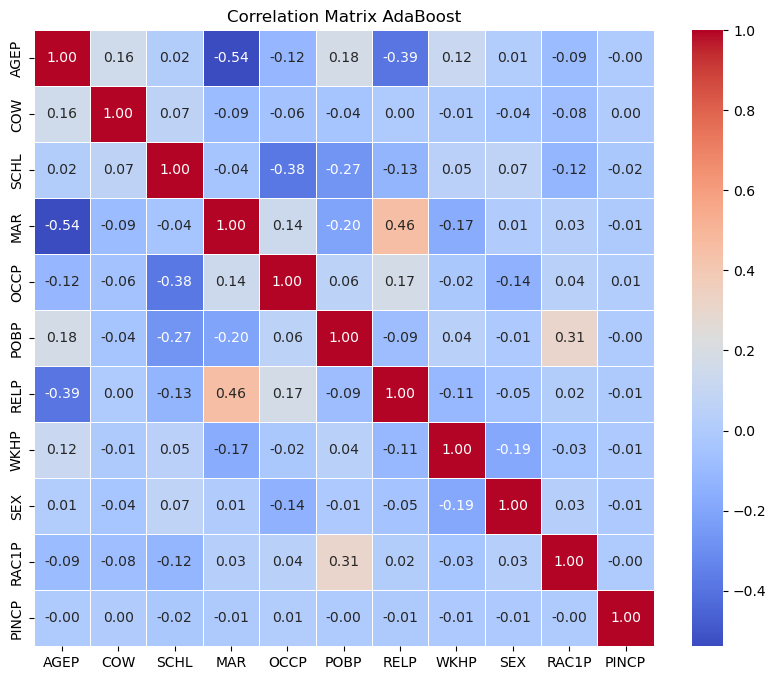

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_ab, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix AdaBoost')
plt.show()

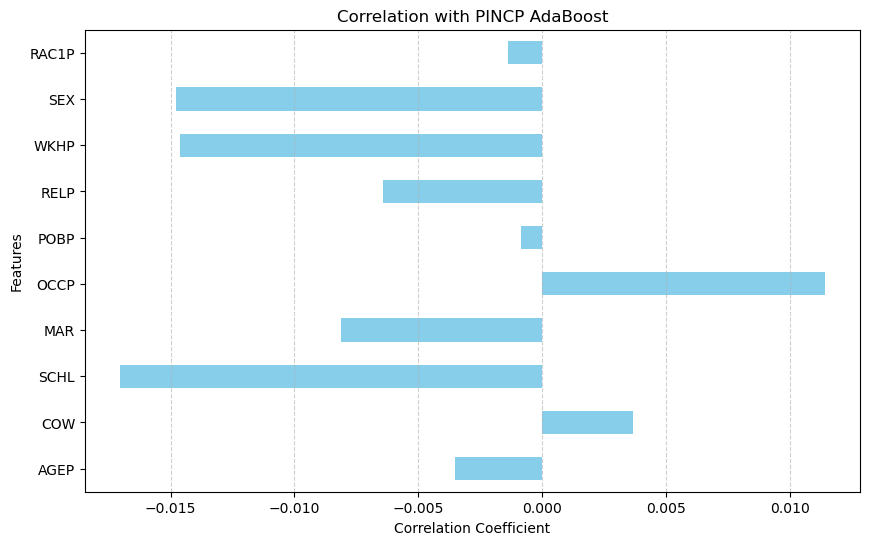

In [17]:
plt.figure(figsize=(10, 6))
correlations_ab.iloc[:-1]['PINCP'].plot(kind='barh', color='skyblue')
plt.title('Correlation with PINCP AdaBoost')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### Evaluez l’importance de chaque feature

In [18]:
perm_importance_ab = permutation_importance(ab_model, X_test_all, df_pred_y_ab, random_state=42)
importance_scores_ab = perm_importance_ab.importances_mean

for i in range(len(importance_scores_ab)):
    print(f"Feature {i}: ", importance_scores_ab[i])

Feature 0:  0.09818311910663635
Feature 1:  0.0
Feature 2:  0.14976107121866455
Feature 3:  0.017591291237574413
Feature 4:  0.11632126338384485
Feature 5:  0.034461963049088974
Feature 6:  0.06451843712467742
Feature 7:  0.1589349142667314
Feature 8:  0.04847571103672092
Feature 9:  0.0


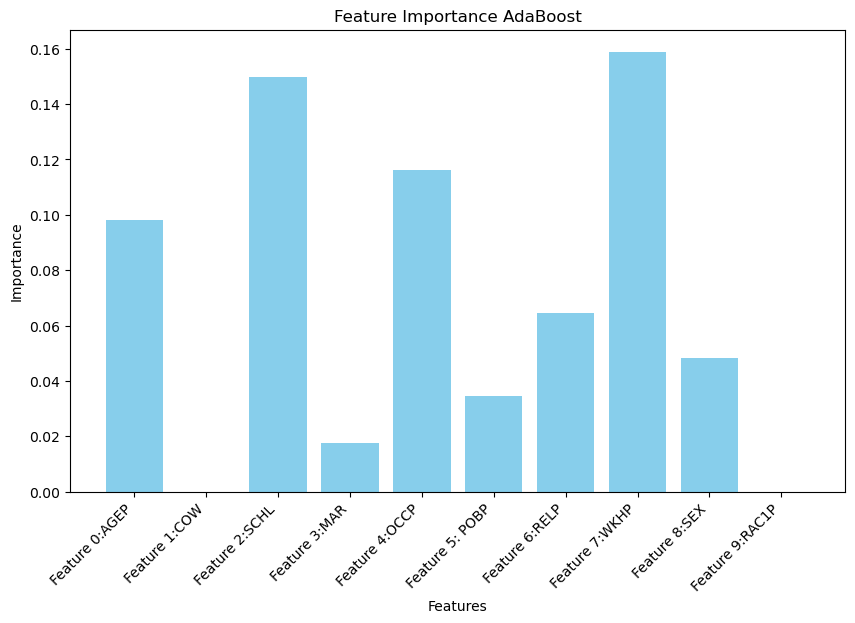

In [19]:
features = ['Feature 0:AGEP', 'Feature 1:COW', 'Feature 2:SCHL', 'Feature 3:MAR', 'Feature 4:OCCP',
            'Feature 5: POBP', 'Feature 6:RELP', 'Feature 7:WKHP', 'Feature 8:SEX', 'Feature 9:RAC1P']
plt.figure(figsize=(10, 6))
plt.bar(features, importance_scores_ab, color='skyblue')
plt.title('Feature Importance AdaBoost')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right') 
plt.show()

## Gradient Boosting

### Correlation avec GradientBoosting

In [20]:
gb_model = GradientBoostingClassifier(criterion="friedman_mse", learning_rate= 0.5, loss='log_loss', n_estimators=50, subsample=1.0)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test_all)

df_pred_y_gb = pd.DataFrame(y_pred_gb, columns=['PINCP'])

merged_gb = pd.merge(X_test_all, df_pred_y_gb, left_index=True, right_index=True)

correlations_gb = merged_gb.corr()
print(correlations_gb)

           AGEP       COW      SCHL       MAR      OCCP      POBP      RELP  \
AGEP   1.000000  0.157100  0.019093 -0.539055 -0.115295  0.176205 -0.393154   
COW    0.157100  1.000000  0.066488 -0.088612 -0.056372 -0.040668  0.001903   
SCHL   0.019093  0.066488  1.000000 -0.040404 -0.380248 -0.274102 -0.128223   
MAR   -0.539055 -0.088612 -0.040404  1.000000  0.135398 -0.203711  0.456431   
OCCP  -0.115295 -0.056372 -0.380248  0.135398  1.000000  0.059838  0.173786   
POBP   0.176205 -0.040668 -0.274102 -0.203711  0.059838  1.000000 -0.087158   
RELP  -0.393154  0.001903 -0.128223  0.456431  0.173786 -0.087158  1.000000   
WKHP   0.121230 -0.008204  0.049207 -0.168743 -0.019337  0.039981 -0.110205   
SEX    0.013512 -0.035906  0.071345  0.006876 -0.140893 -0.014017 -0.049591   
RAC1P -0.088806 -0.077131 -0.121674  0.027233  0.040149  0.305856  0.016153   
PINCP -0.001276  0.009284 -0.017900 -0.002177  0.003044  0.010598 -0.007651   

           WKHP       SEX     RAC1P     PINCP  
AGE

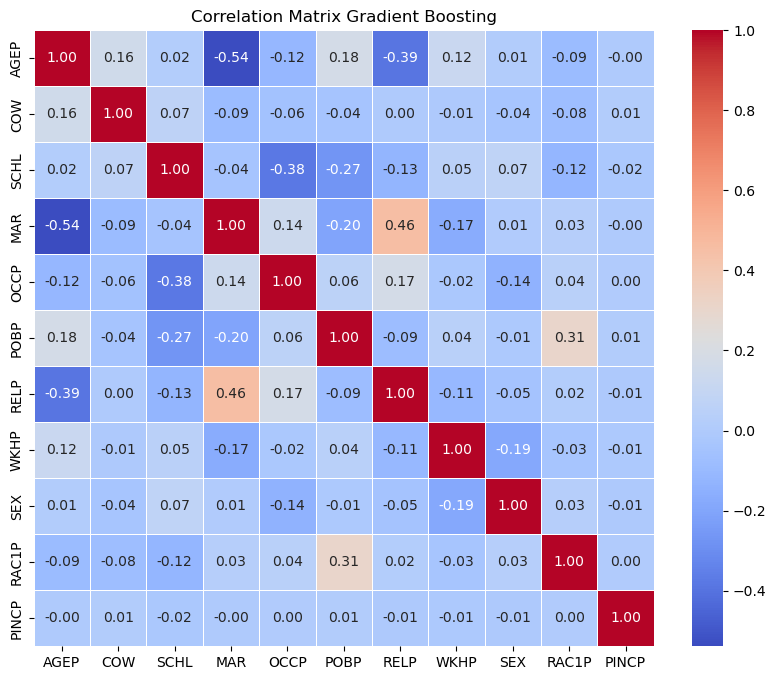

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_gb, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Gradient Boosting')
plt.show()

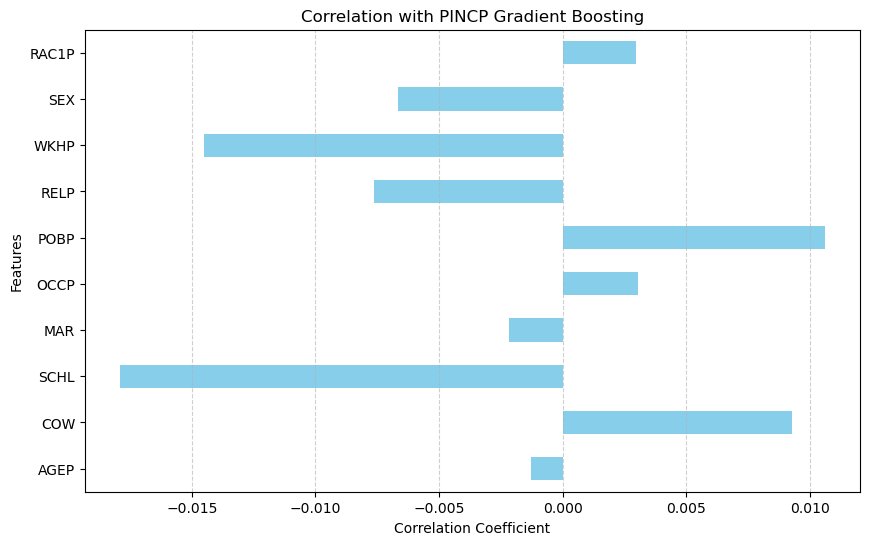

In [22]:
plt.figure(figsize=(10, 6))
correlations_gb.iloc[:-1]['PINCP'].plot(kind='barh', color='skyblue')
plt.title('Correlation with PINCP Gradient Boosting')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### Evaluez l’importance de chaque feature

In [23]:
perm_importance_gb = permutation_importance(gb_model, X_test_all, df_pred_y_gb, random_state=42)
importance_scores_gb = perm_importance_gb.importances_mean

for i in range(len(importance_scores_gb)):
    print(f"Feature {i}: ", importance_scores_gb[i])

Feature 0:  0.11857511563130863
Feature 1:  0.03900033220044463
Feature 2:  0.1344134106764112
Feature 3:  0.019492499936115303
Feature 4:  0.13838448368384737
Feature 5:  0.04369202463394064
Feature 6:  0.0701658446835152
Feature 7:  0.15756011550353918
Feature 8:  0.0401655891447116
Feature 9:  0.01102905476196563


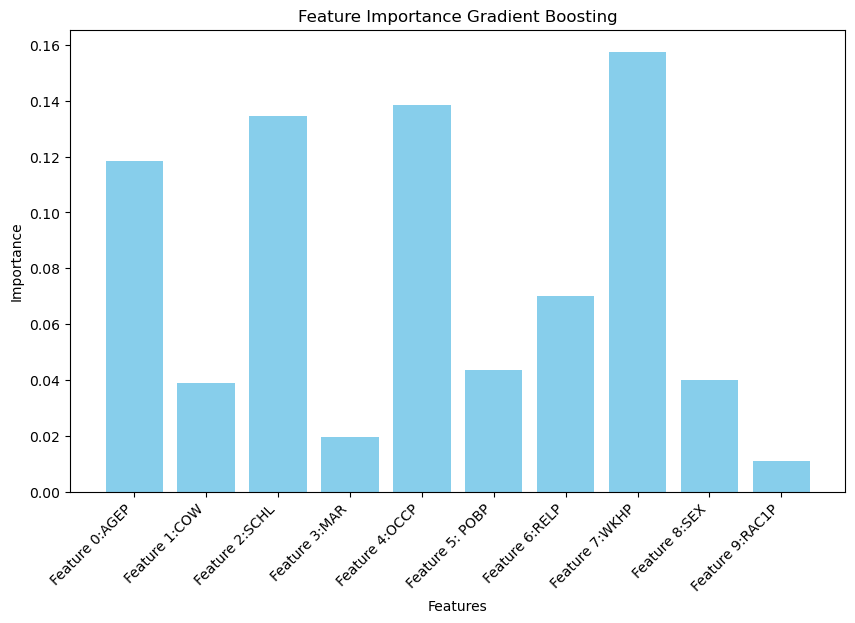

In [24]:
features = ['Feature 0:AGEP', 'Feature 1:COW', 'Feature 2:SCHL', 'Feature 3:MAR', 'Feature 4:OCCP',
            'Feature 5: POBP', 'Feature 6:RELP', 'Feature 7:WKHP', 'Feature 8:SEX', 'Feature 9:RAC1P']
plt.figure(figsize=(10, 6))
plt.bar(features, importance_scores_gb, color='skyblue')
plt.title('Feature Importance Gradient Boosting')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right') 
plt.show()